<a href="https://colab.research.google.com/github/nibinkjoseph/Insurance-Prediction/blob/main/Vehicle_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [ ]:
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [ ]:
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [ ]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [ ]:
print("Shape of train dataset ",train.shape )
print("Shape of test dataset ",test.shape )

Shape of train dataset  (381109, 12)
Shape of test dataset  (127037, 11)


In [ ]:
#checking for null values

train.isnull().sum()

#we founnd that there are no null values in the dataset

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
train.isnull().values.any()

False

In [ ]:
train = train.dropna(how='any',axis=0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [ ]:
#Concatinating both training and testing file for analysis

data= pd.concat([train,test],axis=0,sort=False)

In [ ]:
data.nunique()

id                      508146
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           52062
Policy_Sales_Channel       157
Vintage                    290
Response                     2
dtype: int64

In [ ]:
#Code to find numeric data
numeric_data = train.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(1)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1


In [ ]:
#code to find categorical data
categorical_data = train.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(1)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes


In [ ]:
a = train['Response'].value_counts()/len(train)*100
b = train['Gender'].value_counts()
c = train['Vehicle_Age'].value_counts()
d = train['Vehicle_Damage'].value_counts()

print(a)
print('\n')
print(b)
print('\n')
print(c)
print('\n')
print(d)




0    87.743664
1    12.256336
Name: Response, dtype: float64


Male      206089
Female    175020
Name: Gender, dtype: int64


1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [ ]:
#Outlier Analysis

def outliers(df, variable, distance):
     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
     lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
     upper_boundary = df[variable].quantile(0.75) + (IQR * distance) 
        
     return upper_boundary, lower_boundary
    
upper_limit, lower_limit = outliers(train, 'Annual_Premium', 1.5)
upper_limit, lower_limit  

(61892.5, 1912.5)

In [ ]:
data['Annual_Premium']= np.where(data['Annual_Premium'] > upper_limit, upper_limit, 
                                 np.where(data['Annual_Premium'] < lower_limit, lower_limit, data['Annual_Premium']))

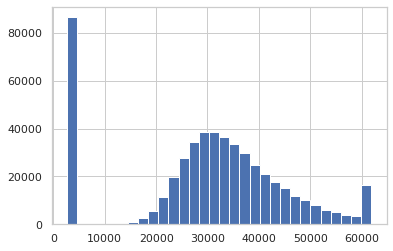

In [ ]:
plt.hist(data['Annual_Premium'],bins=30);

**Exploratory** **data analysis**

In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
#Split the data set into numerical and categorical variables
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
categorical_columns =['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response' ] 

In [ ]:
train[numerical_columns].describe()

#The maximum age given is 85
#50% people are at the age of 36
#mean is 38.8
#standard deviation is 15.5

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [ ]:
col = train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# In the Annual_Premium the 99th percentile is 72544 and the max is 540165 this represents the outliers in this column. Hence it is an outlier

In [ ]:
#Here we have Response as the Independent varaiable or the target variable

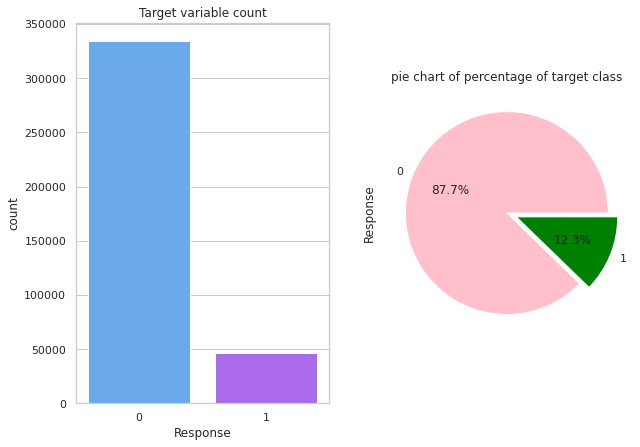

In [ ]:
plt.subplot(1,2,1)
sns.countplot(train['Response'],palette = 'cool')
plt.title("Target variable count")



plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], title = "pie chart of percentage of target class")

From the diagram we read that it is an imbalanced binary problem
Only 12.3 % customers are interested

In [ ]:
print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


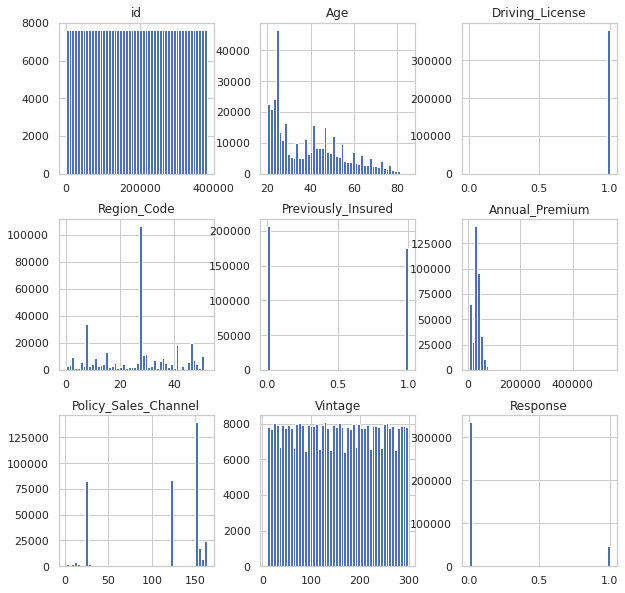

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins= 50, figsize= (10,10))
plt.show()

Plot on Gender

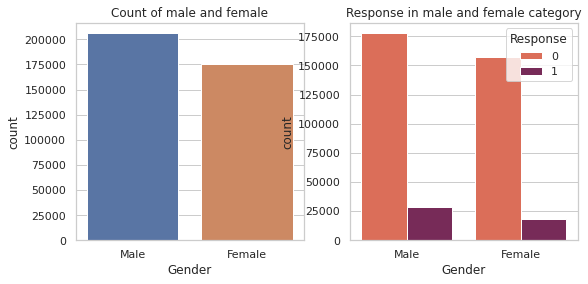

In [ ]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Count of male and female")



plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue= train['Response'], palette= "rocket_r")
plt.title("Response in male and female category")
plt.show()


In [ ]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
#There are 30619 males and 26223 females

#The chance that male would buy the insurance is high than females

EDA on Age

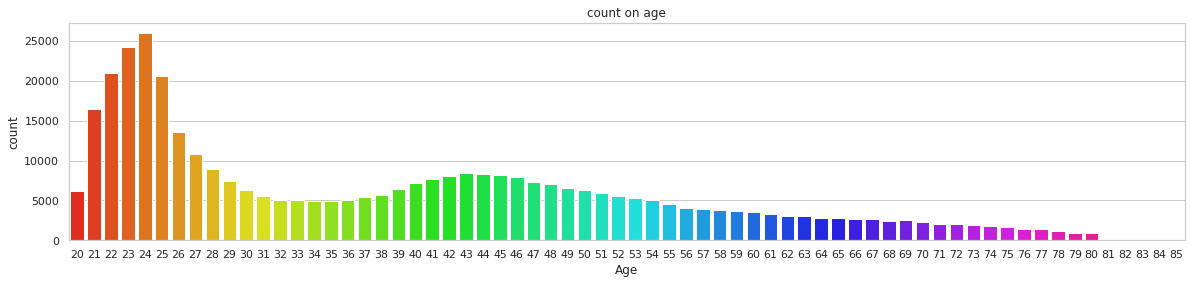

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(train['Age'], palette= 'hsv')
plt.title("count on age")
plt.show()

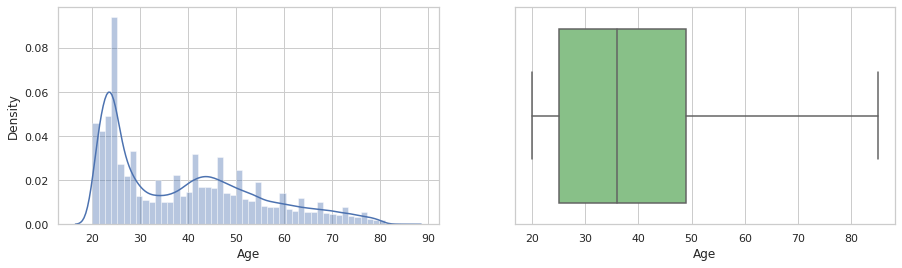

In [ ]:
plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
sns.distplot(train['Age'])


plt.subplot(1,2,2)
sns.boxplot(train['Age'], palette= 'Accent')

EDA on Driving License

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


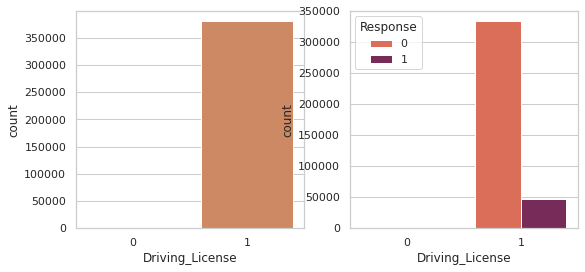

In [ ]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])


plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue= train['Response'], data= train, palette= "rocket_r")

print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)

In [ ]:
#Customers who have the DL are 99%
#Among people has DL who need insurance is less compared to who require no insurance

Region distribution

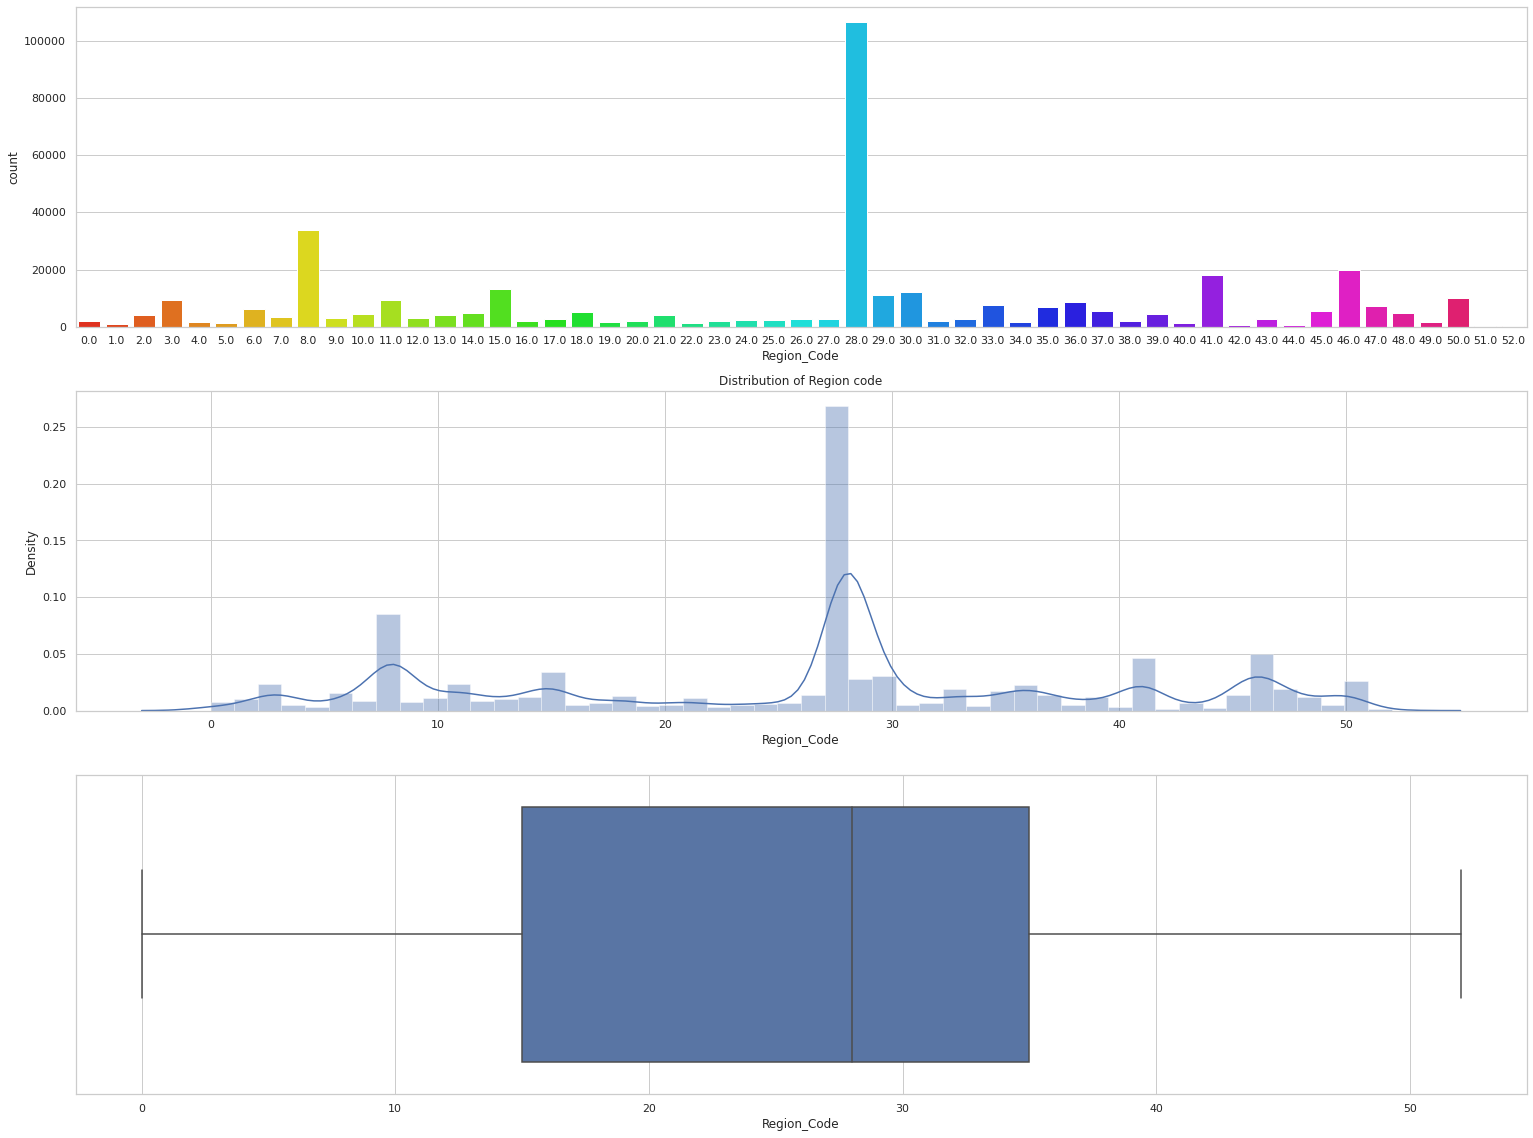

In [ ]:
plt.figure(figsize=(26,20))
plt.subplot(3,1,1)
sns.countplot(train["Region_Code"], data= train, palette= 'hsv')


plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')


plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])


In [ ]:
#Customers from Region Code 28 has more chance of buying insurance

EDA on Previously Insured

Percentage of Previously_Insured feature 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


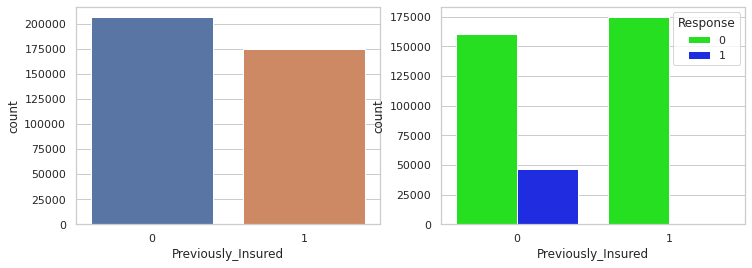

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])

plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue=train['Response'], palette= 'hsv' )

print("Percentage of Previously_Insured feature ")
print(train['Previously_Insured'].value_counts()/len(train)*100)

In [ ]:
#Cutomers who has not previously insured are likely to be interested

Vehicle Age analysis

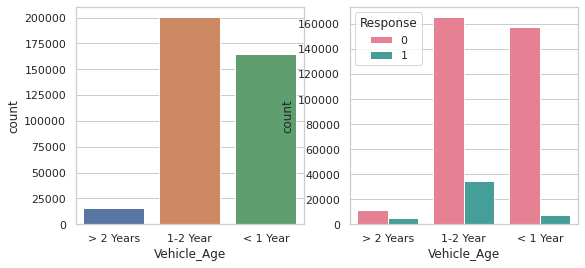

In [ ]:
plt.figure(figsize =(9,4))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])

plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue=train['Response'], palette = 'husl')

In [ ]:
#There are less number of customers with vehicle age greater than 2 years
#customers with vehicle age 1-2 years are more likely to buy the insurance compared to other 

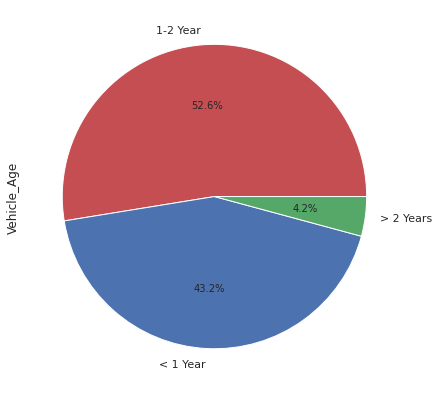

In [ ]:
plt.figure(figsize=(7,7))
train['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['r', 'b', 'g'])

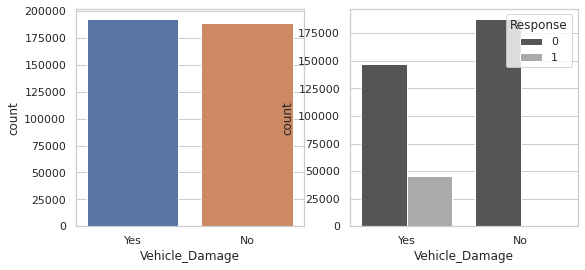

In [ ]:
#Damage Vehicle and Response

plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])


plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Damage'], hue= train['Response'], palette ='binary_r')

In [ ]:
#Customers with vehicle damage are equallly distributed
#Customers with vehicle damage are more interested in the insurance

Annual Premiums

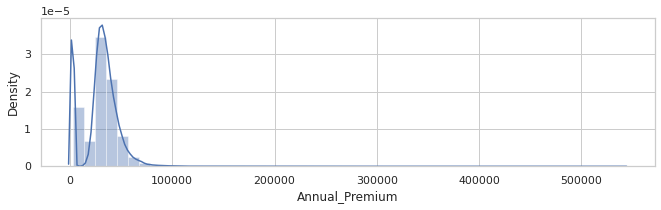

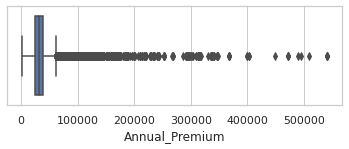

In [ ]:
plt.figure(figsize =(11,6))
plt.subplot (2,1,1)
sns.distplot(train['Annual_Premium'])
plt.show()

plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'])
plt.show()

In [ ]:
#There are more outliers in the annual premium feature

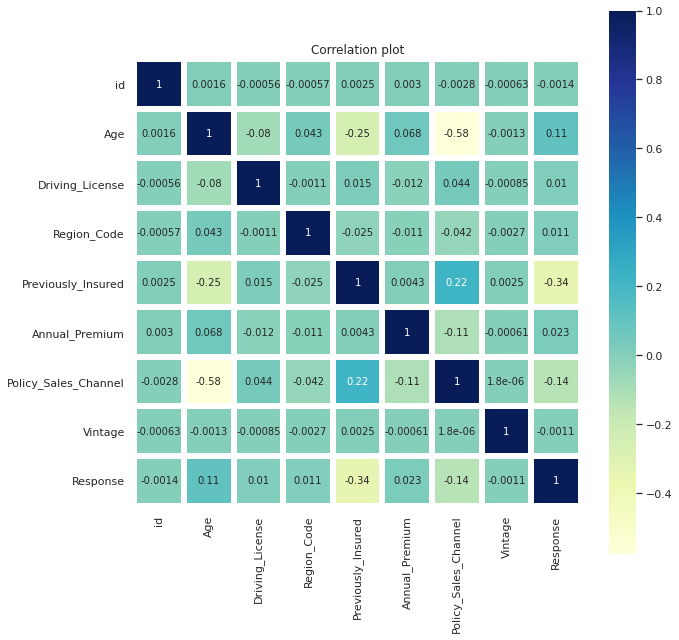

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [ ]:
#policy sales channel has slightly low correlation with Age variable

In [ ]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
#Age vs Annual Premium

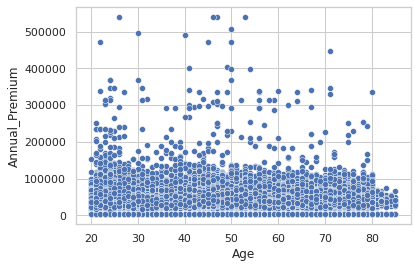

In [ ]:
sns.scatterplot(x= train['Age'], y= train['Annual_Premium'])

In [ ]:
df =train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


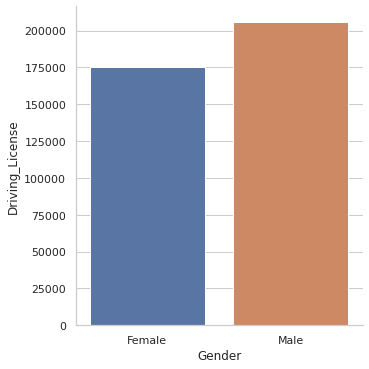

In [ ]:
sns.catplot(x='Gender', y='Driving_License', data=df, kind='bar')

In [ ]:
#Vintage= Number of Days, Customer has been associated with the company

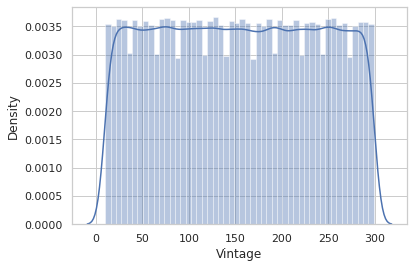

In [ ]:
sns.distplot(train.Vintage)

# Data Preprocessing

In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [ ]:
train=pd.get_dummies(train,drop_first=True)

In [ ]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [ ]:
#Renaming the column name

In [ ]:
train = train.rename(columns ={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1 Year", "Vehicle_Age_> 2 Years" : "Vehicle_Age_gt_ 2 Years"})

In [ ]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [ ]:
num_feat = ['Age','Vintage']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Apply Standardscaler for Age and Vintage
ss = StandardScaler()
train[num_feat]= ss.fit_transform(train[num_feat])

#Apply minmaxscaler for annual premium
mm=MinMaxScaler()
train['Annual_Premium']= mm.fit_transform(train[['Annual_Premium']])

In [ ]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,2,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,3,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,4,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,5,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


For Test Data

In [ ]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])

mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,2,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,3,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,4,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,5,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,381110,1,-0.890089,1,11.0,1,0.070633,152.0,-1.211054,1,0,0
1,381111,1,0.079795,1,28.0,0,0.066321,7.0,-0.517782,0,0,1
2,381112,1,0.532408,1,28.0,0,0.079717,124.0,0.534079,0,0,1
3,381113,1,-0.954748,1,27.0,1,0.073978,152.0,0.390643,1,0,1
4,381114,1,-0.760771,1,28.0,1,0.120293,152.0,1.705469,1,0,0


Splitting Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_target=train['Response']
train=train.drop(['Response'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

Modelling

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,train_target, test_size=0.3, random_state= 124)

In [ ]:
print(X_train.shape, X_test.shape)

(266776, 12) (114333, 12)


In [ ]:
model= DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print (confusion_matrix(y_test, prediction))

[[89863 10362]
 [ 9762  4346]]


In [ ]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    100225
           1       0.30      0.31      0.30     14108

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.83    114333



Random Forest Classifier

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier

In [ ]:
rf_model =RandomForestClassifier(n_estimators =150)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_prediction = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100225
           1       0.40      0.07      0.13     14108

    accuracy                           0.87    114333
   macro avg       0.64      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



In [ ]:
print(confusion_matrix(y_test, rf_prediction))

[[98664  1561]
 [13055  1053]]


In [ ]:
#Feature Importance

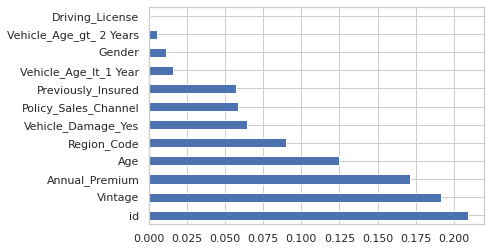

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [ ]:
#Hyper parameter tuning

In [ ]:
#LGBM CLASSIFIER

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
model=LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03,
                     n_estimators=600, objective='binary', reg_alpha=0.1,
                     random_state=101,reg_lambda=0.8)

model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.03, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=600, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=101, reg_alpha=0.1, reg_lambda=0.8, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores=cross_val_score(model, X_test, y_test, cv=cv,scoring='roc_auc')
scores.mean()

0.8561605686582018

In [ ]:
val_pred= model.predict_proba(X_test)[:,1]

In [ ]:
val_pred

array([0.00040605, 0.00102005, 0.01371426, ..., 0.29599544, 0.03823447,
       0.15646365])

In [ ]:
print(roc_auc_score(y_test,val_pred))

0.858271104008043


LOGISTIC REGRESSION

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.fit (X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100225
           1       0.00      0.00      0.00     14108

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

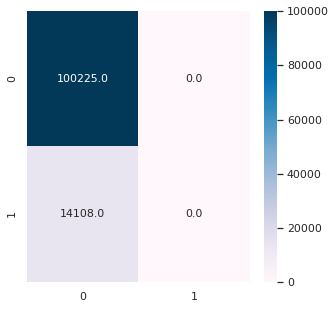

In [ ]:
cm = confusion_matrix(y_test, prediction)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':11}, cmap = 'PuBu',fmt=".1f");

In [ ]:
#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_nb)

0.8766060542450561

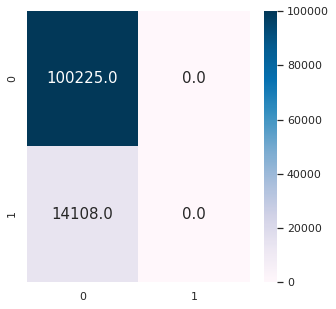

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100225
           1       0.00      0.00      0.00     14108

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_knn)

0.859865480657378

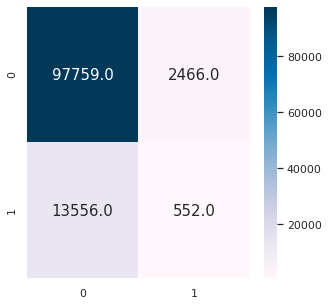

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92    100225
           1       0.18      0.04      0.06     14108

    accuracy                           0.86    114333
   macro avg       0.53      0.51      0.49    114333
weighted avg       0.79      0.86      0.82    114333



In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)


In [ ]:
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8721716389843702

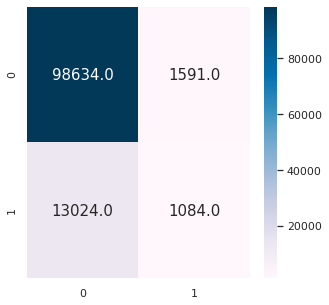

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100225
           1       0.41      0.08      0.13     14108

    accuracy                           0.87    114333
   macro avg       0.64      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



In [ ]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Significance Levels')

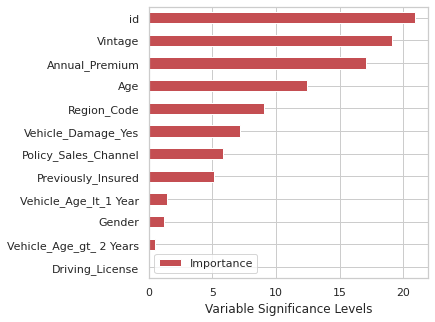

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [ ]:
#Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred_gbm = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred_gbm)

0.8765973078638714

In [ ]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100225
           1       0.48      0.00      0.00     14108

    accuracy                           0.88    114333
   macro avg       0.68      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



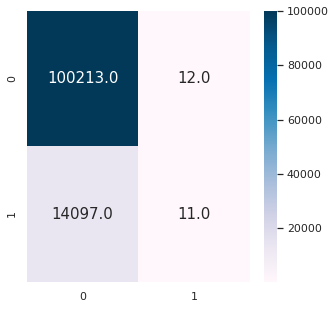

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
#XG Boost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred_xgb_model = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb_model)

0.8766235470074257

In [ ]:
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100225
           1       1.00      0.00      0.00     14108

    accuracy                           0.88    114333
   macro avg       0.94      0.50      0.47    114333
weighted avg       0.89      0.88      0.82    114333



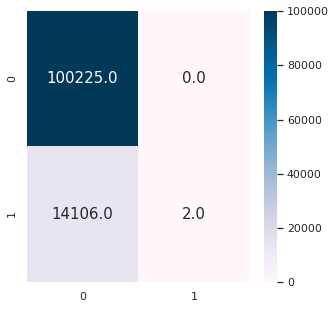

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
from xgboost import XGBClassifier
# Model Tuning
XGB_model = XGBClassifier(random_state = 42, max_depth = 8, n_estimators = 3000, 
                          reg_lambda = 1.2, reg_alpha = 1.2, 
                          min_child_weight = 1,objective = 'binary:logistic',
                         learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5,
                          eval_metric = 'auc').fit(X_train, y_train)

In [ ]:
y_pred_XGB_model = XGB_model.predict(X_test)
accuracy_score(y_test, y_pred_XGB_model)

0.8650870702246946

In [ ]:
print(classification_report(y_test, y_pred_XGB_model))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    100225
           1       0.37      0.13      0.19     14108

    accuracy                           0.87    114333
   macro avg       0.63      0.55      0.56    114333
weighted avg       0.82      0.87      0.84    114333



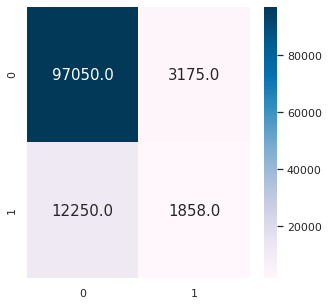

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_XGB_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
models = [
    knn_model,
    nb_model,
    gbm_model,
    xgb_model,
    XGB_model,
    rf_model,
      
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 85.9865%
----------------------------
GaussianNB:
Accuracy: 87.6606%
----------------------------
GradientBoostingClassifier:
Accuracy: 87.6597%
----------------------------
XGBClassifier:
Accuracy: 87.6624%
----------------------------
XGBClassifier:
Accuracy: 86.5087%
----------------------------
RandomForestClassifier:
Accuracy: 87.2172%


In [ ]:
# Create submission file
submmission = pd.DataFrame()
submmission['id'] = test['id'].values
submmission['Response'] = y_test
submmission.to_csv('cat_submitfinal.csv', float_format='%.6f', index=False)

submmission.head()

,id,Response
0,381110,NaN
1,381111,NaN
2,381112,NaN
3,381113,NaN
4,381114,0.0
